# **K-NN**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Carregar dataset
iris = load_iris()

In [2]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = iris.data[:, :2]
y = iris.target

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
y_pred = knn.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
print("Acurácia do KNN: ", accuracy_score(y_test, y_pred))

Acurácia do KNN:  0.8333333333333334


In [9]:
import matplotlib.pyplot as plt

# Plotar fronteira de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

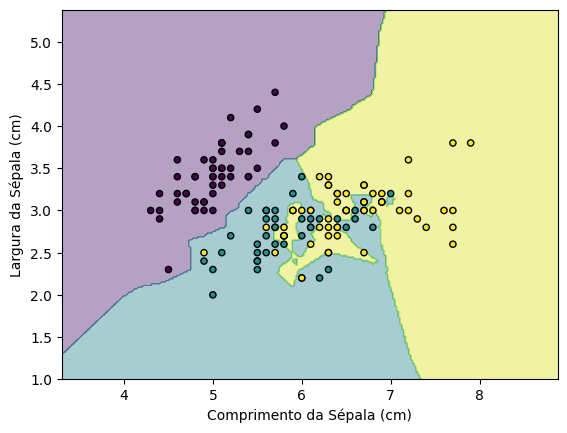

In [10]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel("Comprimento da Sépala (cm)")
plt.ylabel("Largura da Sépala (cm)")
plt.show()

# **Naive Bayes**

In [11]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

data = data[features + [target]].copy()

data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [12]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [13]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[0,18,35,60, 100], labels = ['Crianca', 'Jovem', 'Adulto', 'Idoso'])

In [14]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,AgeGroup
0,3,male,22.0,1,0,7.2500,S,0,Jovem
1,1,female,38.0,1,0,71.2833,C,1,Adulto
2,3,female,26.0,0,0,7.9250,S,1,Jovem
3,1,female,35.0,1,0,53.1000,S,1,Jovem
4,3,male,35.0,0,0,8.0500,S,0,Jovem
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0,Jovem
887,1,female,19.0,0,0,30.0000,S,1,Jovem
888,3,female,28.0,1,2,23.4500,S,0,Jovem
889,1,male,26.0,0,0,30.0000,C,1,Jovem


In [15]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Pclass'] = le.fit_transform(data['Pclass'])
data['AgeGroup'] = le.fit_transform(data['AgeGroup'])

In [16]:
X= data[['Pclass', 'Sex', 'AgeGroup']]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [18]:
from sklearn.metrics import accuracy_score
y_pred = nb.predict(X_test)
print("Acurácia do Naive Bayes: ", accuracy_score(y_test,y_pred))

Acurácia do Naive Bayes:  0.7821229050279329


In [19]:
print("Probabilidades para Pclass=0, Sex= Feminino, AgeGroup=Jovem")
print(nb.predict_proba([[0,1,1]]))

Probabilidades para Pclass=0, Sex= Feminino, AgeGroup=Jovem
[[0.56747372 0.43252628]]


/home/gabriel/ciencia-dados-2/data-science-course-ufsm/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
